<a href="https://colab.research.google.com/github/kappakpr/DeepLearning/blob/master/Copy_of_senti_LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#!ls '/content/gdrive/My Drive/Colab Notebooks'
!ls '/content/gdrive/My Drive'

 colabfiles				    jdk-8u60-windows-x64.exe
'Colab Notebooks'			    ubuntu-16.04.2-desktop-amd64.iso
 E1B458F2-3664-406B-9188-24D8840C594F.JPG  'Untitled spreadsheet.gsheet'
'Getting started.pdf'			    VBoxGuestAdditions.iso
 gparted-live-0.28.1-1-i686.iso


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  !pip uninstall tb-nightly tensorboardX tensorboardX
  # !pip install tf-nightly
except Exception:
  pass

import tensorflow as tf
import os
import datetime
import attr
import tensorflow_datasets as tfds

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
print(tf.__version__)

2.2.0


In [8]:
import pkg_resources
for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard 2.2.2
tensorboard-plugin-wit 1.7.0


In [9]:
!ls /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info/

!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info/

!ls /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info/

INSTALLER  METADATA  RECORD  top_level.txt  WHEEL
ls: cannot access '/usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info/': No such file or directory


In [10]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00',with_info=True,data_dir='/content/drive/My Drive/colabfiles')
train_dataset=dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /content/drive/My Drive/colabfiles/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteTP9086/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /content/drive/My Drive/colabfiles/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
!ls -l /root/tensorflow_datasets/downloads

total 22344
drwxr-xr-x 2 root root     4096 Jul 16 18:41 extracted
-rw-r--r-- 1 root root 22870508 Jul 16 18:41 s3_amaz-revi-pds_tsv_amaz_revi_us_Mobi_ElecPkyC_o4G7jk7fLKKAVqFMDwTbzc_lgbviQOD60eB-6A.gz
-rw-r--r-- 1 root root      222 Jul 16 18:41 s3_amaz-revi-pds_tsv_amaz_revi_us_Mobi_ElecPkyC_o4G7jk7fLKKAVqFMDwTbzc_lgbviQOD60eB-6A.gz.INFO


In [ ]:
!cp /root/tensorflow_datasets/downloads/s3_amaz-revi-pds_tsv_amaz_revi_us_Mobi_ElecPkyC_o4G7jk7fLKKAVqFMDwTbzc_lgbviQOD60eB-6A.gz.INFO '/content/gdrive/colabfiles/testfile.gz.INFO'

cp: cannot create regular file '/content/gdrive/colabfiles/testfile.gz.INFO': No such file or directory


In [ ]:
train_dataset

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>

In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [ ]:
len(list(train_dataset))

104975

In [ ]:
!nvidia-smi

Thu Jul 16 20:43:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    33W / 250W |    353MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
BUFFER_SIZE = 300
BATCH_SIZE = 100

In [12]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [ ]:
for reviews in train_dataset.take(5):
    print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'20602736'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B009L7EEZA'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'970268868'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Ionic Bluetooth Keyboard Tablet Stand Leather Case for New Barnes & Noble Nook HD+ 9-inch Wifi (Black/ Brown)[Does not fit Nook Tablet]'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b"Perfect fit for Nook HD+. Keeps it protected very well, magnet turns nook off, and the blue tooth keyboard is great and holds a charge for many days. The 'kick stand' is an added bonus that proved to be more stable than I thought it would be.">, 'review_date': <tf.Tensor: shape=(), dtype=string, num

In [ ]:
for reviews in train_dataset.take(20):
    review_text = reviews['data']
    print(review_text.get('review_body').numpy())
    print(review_text.get('star_rating'))
    print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

In [13]:
tokenizer = tfds.features.text.Tokenizer()

In [14]:
vocabulary_set = set()

In [15]:
# for all data just .enumerate():
for _, reviews in train_dataset.enumerate():
    #print(reviews)
    review_text = reviews['data']
    reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
    vocabulary_set.update(reviews_tokens)

In [16]:
vocab_size = len(vocabulary_set)
print(f"vocab size {vocab_size}")

vocab size 73738


In [17]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [18]:
for reviews in train_dataset.take(5):
    review_text = reviews['data']
    #print(review_text.get('review_body').numpy())
    encoded_example = encoder.encode(review_text.get('review_body').numpy())
    #print(encoded_example)

In [ ]:
for index in encoded_example:
    print('{} ----> {}'.format(index,encoder.decode([index])))

In [19]:
def encode(text_tensor, label_tensor):
    encoded_text = encoder.encode(text_tensor.numpy())
    label = tf.where(label_tensor>3,1,0)
    return encoded_text, label

In [20]:
def encode_map_fn(tensor):
    text = tensor['data'].get('review_body')
    label = tensor['data'].get('star_rating')

    encoded_text, label = tf.py_function(encode,
                                         inp=[text,label],
                                         Tout=(tf.int64,tf.int32))
    encoded_text.set_shape([None])
    label.set_shape([])

    return encoded_text, label

In [23]:
ar_encoded_data = train_dataset.map(encode_map_fn)

#for f0,f1 in ar_encoded_data.take(2):
#    print(f"f0 encoded review body:- {f0}")
#    print(f"f1 encoded star rating:- {f1}")

In [25]:
TAKE_SIZE = 10000

In [26]:
train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

In [27]:
test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

In [28]:
vocab_size += 1

In [ ]:
sample_text, sample_labels = next(iter(test_data))

#print(sample_text[0])
#print(sample_labels[0])

In [ ]:
for f0,f1 in test_data.take(10):
    print(tf.unique_with_counts(f1)[2].numpy())

[64 36]
[68 32]
[78 22]
[67 33]
[66 34]
[74 26]
[68 32]
[64 36]
[34 66]
[67 33]


In [ ]:
print("model define started")
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64,64]:
    model.add(tf.keras.layers.Dense(units,activation='relu'))
model.add(tf.keras.layers.Dense(1))


model define started


In [ ]:
print("set tensorboar callback and checkpoints")
logdir = os.path.join('/content/gdrive/My Drive/colabfiles/logs',datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/My Drive/colabfiles/sentiment_analysis.hdf5',verbose=1,save_best_only=True)

set tensorboar callback and checkpoints


In [ ]:
print("model compile started")
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model compile started


In [ ]:
print("model fit started")
history=model.fit(train_data,epochs=2,validation_data=test_data,callbacks=[tensorboard_callback,checkpointer])

model.save('/content/gdrive/My Drive/colabfiles/final_sentiment_analysis.hdf5')

model fit started
Epoch 1/2
950/950 [==============================] - ETA: 0s - loss: 0.3623 - accuracy: 0.8363
Epoch 00001: val_loss improved from inf to 0.27738, saving model to /content/gdrive/My Drive/colabfiles/sentiment_analysis.hdf5
950/950 [==============================] - 835s 879ms/step - loss: 0.3623 - accuracy: 0.8363 - val_loss: 0.2774 - val_accuracy: 0.8884
Epoch 2/2
950/950 [==============================] - ETA: 0s - loss: 0.2300 - accuracy: 0.9056
Epoch 00002: val_loss did not improve from 0.27738
950/950 [==============================] - 837s 881ms/step - loss: 0.2300 - accuracy: 0.9056 - val_loss: 0.2778 - val_accuracy: 0.8936


In [ ]:
eval_loss, eval_acc = model.evaluate(test_data)

100/100 [==============================] - 37s 366ms/step - loss: 0.2778 - accuracy: 0.8936


In [ ]:
for f0,f1 in test_data.take(1):
  print(f"actual labels:- {f1}")
  print(f"predicted labels:- {model.predict(f0)} +ve=1 and -ve=0")

actual labels:- [1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1]
predicted labels:- [[ 5.3618402 ]
 [-1.529299  ]
 [ 5.4608717 ]
 [ 3.3693905 ]
 [ 2.6012151 ]
 [-0.368173  ]
 [-1.2707765 ]
 [ 3.8979452 ]
 [ 4.424858  ]
 [-3.3911264 ]
 [-0.9889862 ]
 [ 4.9206405 ]
 [ 4.3371    ]
 [ 4.5599422 ]
 [ 4.7615848 ]
 [ 4.4415636 ]
 [-1.1868194 ]
 [-0.82897294]
 [ 5.0935197 ]
 [ 5.2715693 ]
 [-3.3656256 ]
 [ 0.04816687]
 [ 5.1379166 ]
 [ 5.014592  ]
 [ 5.221121  ]
 [ 1.9805354 ]
 [-2.637799  ]
 [ 4.2529945 ]
 [ 4.6795306 ]
 [ 2.1930034 ]
 [ 2.9651449 ]
 [ 3.9347782 ]
 [ 1.7794207 ]
 [ 5.3931465 ]
 [-2.588462  ]
 [ 4.840185  ]
 [-2.0020478 ]
 [ 4.5156517 ]
 [-4.5197344 ]
 [ 3.611327  ]
 [ 1.2904301 ]
 [ 4.166727  ]
 [-2.1844757 ]
 [ 4.575974  ]
 [ 4.651437  ]
 [ 5.161581  ]
 [ 4.5156703 ]
 [ 4.879048  ]
 [ 1.6261514 ]
 [ 2.4840426 ]
 [-1.161040

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,878,593
Trainable params: 9,878,593
Non-trainable params: 0
______________________________________________

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

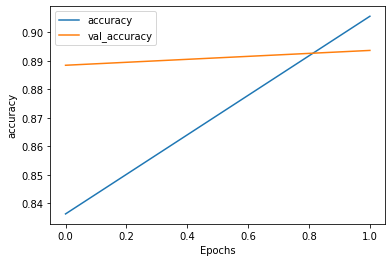

In [ ]:
plot_graphs(history,'accuracy')

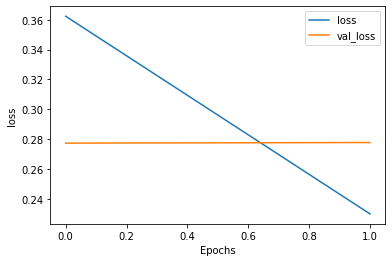

In [ ]:
plot_graphs(history,'loss')

In [29]:
tf.keras.backend.clear_session()
sa_load = tf.keras.models.load_model('/content/gdrive/My Drive/colabfiles/sentiment_analysis.hdf5', compile=False)

In [30]:
def pad_to_size(vec,size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [31]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text,32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text,0))
  return (predictions)

In [32]:
pred_text = ('This watch is pretty bad. Color and dial look pathetic')
predictions = predict_fn(pred_text)
print(predictions)

[15606, 24804, 42951, 39409, 33229, 41221, 72173, 6832, 62243, 3963]
[15606, 24804, 42951, 39409, 33229, 41221, 72173, 6832, 62243, 3963, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0.8173491]]


In [33]:
pred_text = ('bad batch of watches')
predictions = predict_fn(pred_text)
print(predictions)

[33229, 29316, 43471, 57637]
[33229, 29316, 43471, 57637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-0.08192927]]


In [34]:
pred_text = ('This watch is pretty good. Color and dial look could be better')
predictions = predict_fn(pred_text)
print(predictions)

[15606, 24804, 42951, 39409, 23215, 41221, 72173, 6832, 62243, 28401, 32119, 38321]
[15606, 24804, 42951, 39409, 23215, 41221, 72173, 6832, 62243, 28401, 32119, 38321, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[2.3603022]]


In [36]:
pred_text = ('best ever watch')
predictions = predict_fn(pred_text)
print(predictions)

[12993, 20364, 24804]
[12993, 20364, 24804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0.5505378]]


In [37]:
pred_text = ('This watch is great')
predictions = predict_fn(pred_text)
print(predictions)

[15606, 24804, 42951, 21668]
[15606, 24804, 42951, 21668, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0.04468853]]
